In [ ]:
%matplotlib inline

(934, 4)

<Container object of 134 artists>

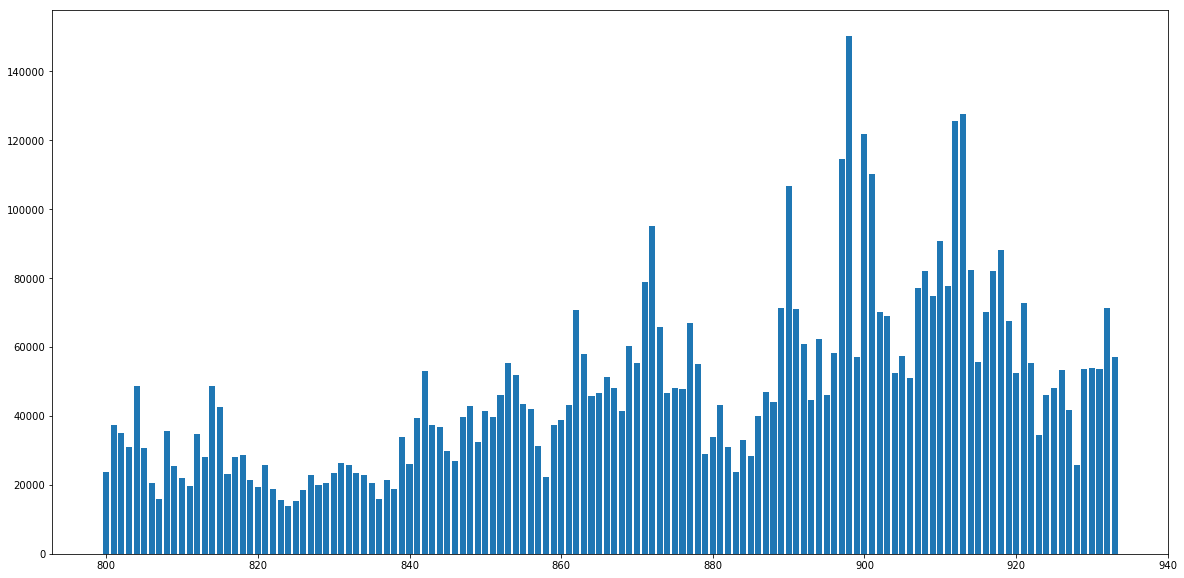

In [81]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))


df = pd.read_csv("daily_count_by_side.csv")
df["TOTAL"] = df["BUY"] + df["SELL"]
df.shape
# df.head()
df=df[800:1000]
plt.bar(df.index, df["TOTAL"] )

In [102]:
count_data = df["TOTAL"]
n_count_data = len(count_data)
#count_data, 
# n_count_data, count_data.mean()

first_half_mean = count_data[:n_count_data//2].mean()
second_half_mean = count_data[n_count_data//2:].mean()
first_half_mean, second_half_mean

import pymc as pm


alpha = 1.0 #/ count_data.mean()  # Recall count_data is the
                               # variable that holds our txt counts
alpha_1 = 1.0/first_half_mean
alpha_2 = 1.0/second_half_mean    
lambda_1 = pm.Exponential("lambda_1", alpha_1)
lambda_2 = pm.Exponential("lambda_2", alpha_2)
tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)
print("Random output:", tau.random(), tau.random(), tau.random())

@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

(32145.298507462685, 63576.67164179104)

Random output: 28 39 21


In [103]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 17.4 sec

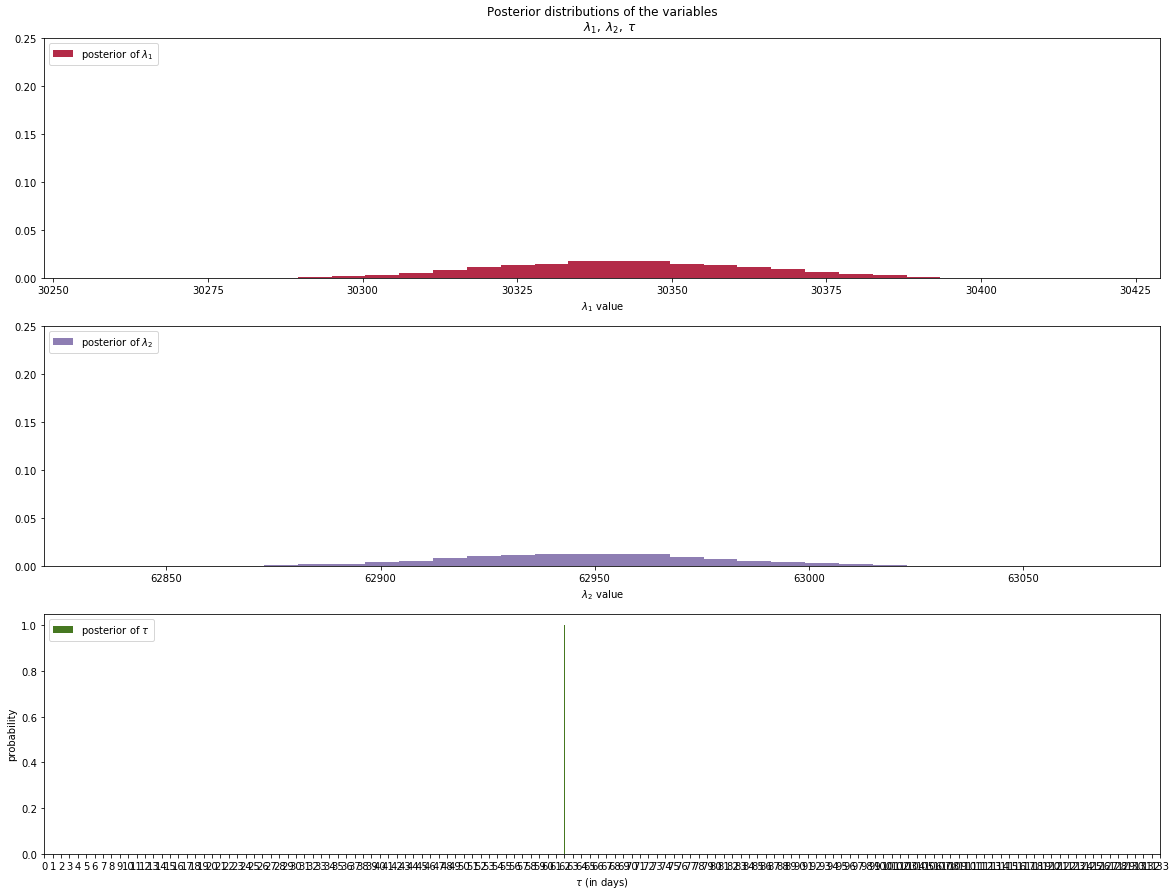

In [104]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]
# lambda_1_samples

plt.figure(figsize=(20,15))
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
# plt.xlim([15, 30])
plt.ylim([0, .25])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
# plt.xlim([15, 30])
plt.ylim([0, .25])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
# plt.ylim([0, 1.25])
# plt.xlim([tau_samples.mean()-10, tau_samples.mean()+10])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

In [105]:
print(tau_samples)

[62 62 62 ..., 62 62 62]


In [112]:
dir(mcmc.trace)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']